# Exoplanetas

Vamos a obtener una lista de exoplanetas con las siguientes propiedades:

-Masa

-Período orbital

-Tipo de estrella del sistema


Para esto haremos uso de la base de datos exoplanet.eu

In [1]:
import pyvo

In [2]:
#seleccionamos el servicio que queremos usar
service = pyvo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap")

La base de datos (o tabla?) principal es exoplanet.epn_core. Hacemos un query de este servicio seleccionando esa tabla.

In [3]:
#veamos primero la masa
query="SELECT mass FROM exoplanet.epn_core"

#guardamos el resultado en una tabla llamada masa
masa = service.search(query) 


In [4]:
#veamos cuantos exoplanetas contiene la tabla
len(masa)

4315

In [5]:
masa

<Table length=4315>
     mass    
'jupiterMass'
   float64   
-------------
           --
         21.0
           --
           --
           --
           --
           --
           --
           --
          ...
           --
           --
           --
           --
           --
         0.62
          9.1
        23.58
           --
         40.0

In [6]:
#guardamos los datos como una votable (VO table)
#primero accedemos a la VO table en nuestro array de resultados
vot=masa.votable

In [7]:
#para guardar la VO table en resultados1.xml
vot.to_xml("resultados1.xml")

In [8]:
#para acceder a los datos desde el archivo gurdado:
#necesitamos el paquete parse
from astropy.io.votable import parse
vot = parse("resultados1.xml")
#seleccionamos la tabla
masa = votable.get_first_table()


NameError: name 'votable' is not defined

In [9]:
#veamos de nuevo pero cuando la masa si tiene valor
query="SELECT mass FROM exoplanet.epn_core WHERE mass IS NOT NULL"
masa2 = service.search(query) 

In [10]:
masa2

<Table length=1255>
     mass    
'jupiterMass'
   float64   
-------------
         21.0
         14.0
         32.0
         13.0
         20.0
         13.9
          7.5
          1.9
         20.0
          ...
        63.88
        11.09
         13.0
        13.01
      0.01517
         5.84
         0.62
          9.1
        23.58
         40.0

In [11]:
masa2.getvalue(name='mass', index=9)

30.0

In [12]:
query = "SELECT period FROM exoplanet.epn_core"
periodo = service.search(query)
periodo

<Table length=4315>
 period 
   d    
float64 
--------
  326.03
730000.0
  516.22
  185.84
  1773.4
   799.5
  578.38
   993.3
      --
     ...
  162.87
  636.13
    20.0
   49.41
   305.5
 4.61711
 240.937
1281.439
 3848.86
      --

In [13]:
query = "SELECT period FROM exoplanet.epn_core WHERE period IS NOT NULL"
periodo2 = service.search(query)
periodo2

<Table length=4102>
 period 
   d    
float64 
--------
  326.03
730000.0
  516.22
  185.84
  1773.4
   799.5
  578.38
   993.3
  3725.0
     ...
 3.31249
  162.87
  636.13
    20.0
   49.41
   305.5
 4.61711
 240.937
1281.439
 3848.86

Vemos que el total de exoplanetas es 4310 de los cuales 1255 tienen datos sobre su masa y 4097 tienen datos sobre su periodo.

In [14]:
#veamos lo mismo para el tipo de estrella
query = "SELECT star_spec_type FROM exoplanet.epn_core"
tipo_estrella = service.search(query)
tipo_estrella

<Table length=4315>
star_spec_type
    object    
--------------
        G8 III
            M9
         K4III
         K0III
          K0 V
        G2.5 V
        K3 III
         G6III
              
           K7V
           ...
        G8.5 V
        G8.5 V
        G8.5 V
        G8.5 V
         K2III
          F8 V
          F8 V
          F8 V
          F8 V
           A3V

In [15]:
#veamos si todos los exoplanetas tienen datos de su estrella
query = "SELECT star_spec_type FROM exoplanet.epn_core WHERE star_spec_type IS NOT NULL"
tipo_estrella2 = service.search(query)
tipo_estrella2

<Table length=2147>
star_spec_type
    object    
--------------
        G8 III
            M9
         K4III
         K0III
          K0 V
        G2.5 V
        K3 III
         G6III
              
           K7V
           ...
        G8.5 V
        G8.5 V
        G8.5 V
        G8.5 V
         K2III
          F8 V
          F8 V
          F8 V
          F8 V
           A3V

Vemos que de los 4310 exoplanetas solo 2142 tienen el dato del tipo espectral de su estrella.

Hagamos una tabla o lista con las 3 propiedades (campos).

In [16]:
query = "SELECT mass, period, star_spec_type FROM exoplanet.epn_core"
mi_resultado = service.search(query)
mi_resultado

<Table length=4315>
     mass      period  star_spec_type
'jupiterMass'    d                   
   float64    float64      object    
------------- -------- --------------
           --   326.03         G8 III
         21.0 730000.0             M9
           --   516.22          K4III
           --   185.84          K0III
           --   1773.4           K0 V
           --    799.5         G2.5 V
           --   578.38         K3 III
           --    993.3          G6III
           --       --               
          ...      ...            ...
           --   162.87         G8.5 V
           --   636.13         G8.5 V
           --     20.0         G8.5 V
           --    49.41         G8.5 V
           --    305.5          K2III
         0.62  4.61711           F8 V
          9.1  240.937           F8 V
        23.58 1281.439           F8 V
           --  3848.86           F8 V
         40.0       --            A3V

In [17]:
#vamos a incluir el nombre del exoplaneta y el nombre de la estrella
query = "SELECT target_name, mass, period, star_name, star_spec_type FROM exoplanet.epn_core"
mi_resultado = service.search(query)
mi_resultado

<Table length=4315>
target_name       mass      period  star_name star_spec_type
             'jupiterMass'    d                             
   object       float64    float64    object      object    
------------ ------------- -------- --------- --------------
    11 Com b            --   326.03    11 Com         G8 III
    11 Oph b          21.0 730000.0    11 Oph             M9
    11 UMi b            --   516.22    11 UMi          K4III
    14 And b            --   185.84    14 And          K0III
    14 Her b            --   1773.4    14 Her           K0 V
  16 Cyg B b            --    799.5  16 Cyg B         G2.5 V
    17 Sco b            --   578.38    17 Sco         K3 III
    18 Del b            --    993.3    18 Del          G6III
1I/'Oumuamua            --       --       Sun               
         ...           ...      ...       ...            ...
   tau Cet e            --   162.87   tau Cet         G8.5 V
   tau Cet f            --   636.13   tau Cet         G8.5 V
   t

In [18]:
#guardemos en una VO table
vot=mi_resultado.votable
vot.to_xml("mi_resultado.xml")

# Estudio tipo de detección

In [19]:
query = "SELECT target_name, detection_type, mass, mass_detection_type FROM exoplanet.epn_core"
deteccion_masa = service.search(query)
deteccion_masa

<Table length=4315>
target_name   detection_type      mass     mass_detection_type
                             'jupiterMass'                    
   object         object        float64           object      
------------ --------------- ------------- -------------------
    11 Com b Radial Velocity            --                    
    11 Oph b         Imaging          21.0                    
    11 UMi b Radial Velocity            --                    
    14 And b Radial Velocity            --                    
    14 Her b Radial Velocity            --                    
  16 Cyg B b Radial Velocity            --                    
    17 Sco b Radial Velocity            --     Radial Velocity
    18 Del b Radial Velocity            --                    
1I/'Oumuamua         Imaging            --                    
         ...             ...           ...                 ...
   tau Cet e Radial Velocity            --     Radial Velocity
   tau Cet f Radial Velocity       

In [20]:
query = "SELECT target_name, detection_type FROM exoplanet.epn_core WHERE mass IS NULL"
sin_masa = service.search(query)
sin_masa

<Table length=3060>
 target_name    detection_type
    object          object    
-------------- ---------------
      11 Com b Radial Velocity
      11 UMi b Radial Velocity
      14 And b Radial Velocity
      14 Her b Radial Velocity
    16 Cyg B b Radial Velocity
      17 Sco b Radial Velocity
      18 Del b Radial Velocity
  1I/'Oumuamua         Imaging
1SWASP J1407 b Primary Transit
      24 Boo b Radial Velocity
           ...             ...
     ome Ser b Radial Velocity
     omi CrB b Radial Velocity
   omi UMa A b Radial Velocity
     sig Per b Radial Velocity
     tau Cet e Radial Velocity
     tau Cet f Radial Velocity
     tau Cet g Radial Velocity
     tau Cet h Radial Velocity
     tau Gem b Radial Velocity
     ups And e Radial Velocity

Para los exoplanetas que no tienen datos de la masa vemos que predomina la técnica de detección por velocidad radial (justo en estos casos que se muestran).

In [21]:
query = "SELECT target_name, detection_type, mass, mass_detection_type FROM exoplanet.epn_core WHERE mass IS NOT NULL"
deteccion_masa2 = service.search(query)
deteccion_masa2

<Table length=1255>
      target_name        detection_type      mass     mass_detection_type
                                        'jupiterMass'                    
         object              object        float64           object      
----------------------- --------------- ------------- -------------------
               11 Oph b         Imaging          21.0                    
            1RXS 1609 b         Imaging          14.0                    
1RXS J235133.3+312720 b         Imaging          32.0                    
      2M 0103-55 (AB) b         Imaging          13.0                    
           2M 0122-24 b         Imaging          20.0                    
           2M 0219-39 b         Imaging          13.9            Spectrum
           2M 0441+23 b         Imaging           7.5                    
           2M 1938+46 b          Pulsar           1.9                 TTV
           2M 2140+16 b         Imaging          20.0                    
                  

In [22]:
query="SELECT detection_type FROM exoplanet.epn_core GROUP BY detection_type"
grupos_detect = service.search(query)
grupos_detect

<Table length=9>
   detection_type  
       object      
-------------------
         Astrometry
            Imaging
       Microlensing
              Other
    Primary Transit
Primary Transit#TTV
             Pulsar
    Radial Velocity
                TTV

Vemos que hay 9 tipos de técnicas o tipos de detección. A continuación vemos que son 8 para la detección de masa:

In [23]:
query="SELECT mass_detection_type FROM exoplanet.epn_core GROUP BY mass_detection_type"
grupos_masa_detect = service.search(query)
grupos_masa_detect

<Table length=8>
mass_detection_type
       object      
-------------------
         Astrometry
       Microlensing
             Pulsar
    Radial Velocity
           Spectrum
        Theoretical
                TTV
                   

In [24]:
query = "SELECT detection_type, COUNT(detection_type) AS cantidad FROM exoplanet.epn_core GROUP BY detection_type ORDER BY cantidad DESC"
cant_por_tipo = service.search(query)
cant_por_tipo

<Table length=9>
   detection_type   cantidad
       object        int32  
------------------- --------
    Primary Transit     3098
    Radial Velocity      907
       Microlensing      122
            Imaging      112
             Pulsar       44
                TTV       18
              Other        9
         Astrometry        3
Primary Transit#TTV        2

In [25]:
#veamos cuando la masa no es nula, es decir cuando el exoplaneta si tiene datos
query = "SELECT detection_type, COUNT(detection_type) AS cantidad FROM exoplanet.epn_core WHERE mass IS NOT NULL GROUP BY detection_type ORDER BY cantidad DESC"
cant_por_tipo2 = service.search(query)
cant_por_tipo2

<Table length=9>
   detection_type   cantidad
       object        int32  
------------------- --------
    Primary Transit      888
       Microlensing      120
            Imaging      110
    Radial Velocity       81
             Pulsar       29
                TTV       17
              Other        5
         Astrometry        3
Primary Transit#TTV        2

Vemos que el orden cambió. Por ejemplo: hay 902 exoplanetas detectados por velocidad radial pero sólo 81 de ellos tienen datos sobre la masa.

In [26]:
query = "SELECT mass_detection_type, COUNT(mass_detection_type) AS cantidad FROM exoplanet.epn_core GROUP BY mass_detection_type ORDER BY cantidad DESC"
cant_por_tipo_detect_masa = service.search(query)
cant_por_tipo_detect_masa

<Table length=8>
mass_detection_type cantidad
       object        int32  
------------------- --------
    Radial Velocity      809
           Spectrum      149
       Microlensing       75
                TTV       62
        Theoretical       57
         Astrometry        8
             Pulsar        8
                           0

In [27]:
#veamos si todos tienen datos de la masa
query = "SELECT mass_detection_type, COUNT(mass_detection_type) AS cantidad FROM exoplanet.epn_core WHERE mass IS NOT NULL GROUP BY mass_detection_type ORDER BY cantidad DESC"
cant_por_tipo_detect_masa2 = service.search(query)
cant_por_tipo_detect_masa2

<Table length=8>
mass_detection_type cantidad
       object        int32  
------------------- --------
    Radial Velocity      423
           Spectrum      112
       Microlensing       75
                TTV       57
        Theoretical       56
         Astrometry        8
             Pulsar        3
                           0

Vemos que si hay menos cantidad de exoplanetas que tienen datos de la masa a pesar de que figura el tipo de técnica de detección de masa.

Encuentro una contradicción aquí porque obtengo 423 exoplanetas con datos de su masa detectada por velocidad radial y antes había encontrado que eran 81 planetas con datos de masa cuando al exoplaneta se lo detectaba por velocidad radial.

Veamos qué pasa con el período orbital.

In [28]:
query = "SELECT detection_type, COUNT(detection_type) AS cantidad FROM exoplanet.epn_core WHERE period IS NOT NULL GROUP BY detection_type ORDER BY cantidad DESC"
detect_con_periodo = service.search(query)
detect_con_periodo

<Table length=9>
   detection_type   cantidad
       object        int32  
------------------- --------
    Primary Transit     3093
    Radial Velocity      906
             Pulsar       42
            Imaging       24
                TTV       18
       Microlensing        8
              Other        6
         Astrometry        3
Primary Transit#TTV        2

# Estudio distribución distancias 

In [29]:
query = "SELECT star_name, star_distance FROM exoplanet.epn_core"
distancia = service.search(query)
distancia

<Table length=4315>
star_name star_distance
                pc     
  object     float64   
--------- -------------
   11 Com         110.6
   11 Oph         145.0
   11 UMi         119.5
   14 And          76.4
   14 Her          18.1
 16 Cyg B         21.41
   17 Sco         116.0
   18 Del          73.1
      Sun            --
      ...           ...
  tau Cet          3.65
  tau Cet          3.65
  tau Cet          3.65
  tau Cet          3.65
  tau Gem          98.4
  ups And         13.47
  ups And         13.47
  ups And         13.47
  ups And         13.47
zet Del A         67.48

In [30]:
#veamos solo los que sí tienen el dato de la distancia
query = "SELECT star_name, star_distance FROM exoplanet.epn_core WHERE star_distance IS NOT NULL ORDER BY star_distance ASC"
distancia2 = service.search(query)
distancia2

<Table length=3118>
     star_name      star_distance
                          pc     
       object          float64   
------------------- -------------
   Proxima Centauri         1.295
   Proxima Centauri         1.295
     Barnard's star           1.8
           Wolf 359          2.42
           Wolf 359          2.42
      Lalande 21185          2.55
        eps Eridani           3.2
             GJ 887        3.2871
             GJ 887        3.2871
                ...           ...
  MOA-2011-BLG-262L        7350.0
 MOA-2011-BLGL-028L        7380.0
OGLE-2018-BLG-1700L        7600.0
  MOA-2011-BLG-293L        7700.0
OGLE-2018-BLG-0677L        7700.0
   MOA-2011-BLG-322        7740.0
OGLE-2015-BLG-0051L        8200.0
          SWEEPS-04        8500.0
          SWEEPS-11        8500.0
      XTE J1751-305       11000.0

In [31]:
distancia2['star_distance']      #despues voy a hacer un grafico para ver si es gaussiana con los datos de la columna distancia

masked_array(data=[1.295, 1.295, 1.8, ..., 8500.0, 8500.0, 11000.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

Vemos que  hay 3113 resultados. Agrupemos los exoplanetas por sistema (estrella).

In [32]:
query = "SELECT star_name FROM exoplanet.epn_core WHERE star_distance IS NOT NULL GROUP BY star_name"
distancia3 = service.search(query)
distancia3

<Table length=2629>
  star_name  
    object   
-------------
       11 Com
       11 Oph
       11 UMi
       14 And
       14 Her
     16 Cyg B
       17 Sco
       18 Del
    1RXS 1609
 1SWASP J1407
          ...
         XO-3
         XO-4
         XO-5
         XO-6
         XO-7
XTE J1751-305
XTE J1807-294
       YBP401
       YZ Cet
    zet Del A

In [33]:
query = "SELECT star_name, star_distance FROM exoplanet.epn_core WHERE star_distance IS NOT NULL GROUP BY star_name ORDER BY star_distance ASC"
distancia3 = service.search(query)
distancia3

DALQueryError: Field query: column "epn_core.star_distance" must appear in the GROUP BY clause or be used in an aggregate function
LINE 1: ...e8cbd0" CURSOR WITHOUT HOLD FOR SELECT star_name, star_dista...
                                                             ^

In [ ]:
#trabajemos con el resultado distancia2

#quiero separar los sistemas, es decir sacar los nombres repetidos. pero quedarme con el dato de su distancia tambien


i=0
distancias = []

for i in range(len(distancia2)):
    distancias.append(distancia2.getvalue(name = 'star_distance', index = i))
    
#distancias

In [35]:
import matplotlib.pyplot as plt

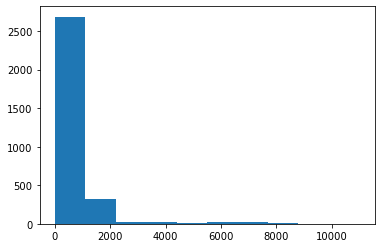

In [36]:
plt.hist(distancias);

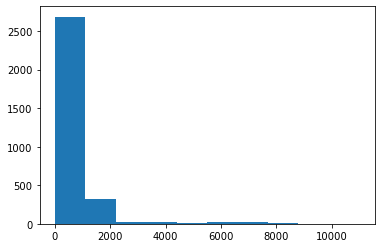

In [37]:
#quiero ver si no estuvieran ordenados 

query = "SELECT star_name, star_distance FROM exoplanet.epn_core WHERE star_distance IS NOT NULL"
distancia_prueba = service.search(query)

i=0
prueba = []

for i in range(len(distancia_prueba)):
    prueba.append(distancia_prueba.getvalue(name = 'star_distance' , index = i))
    
plt.hist(prueba);                            



#vemos que si da lo mismo

# Masa vs Radio

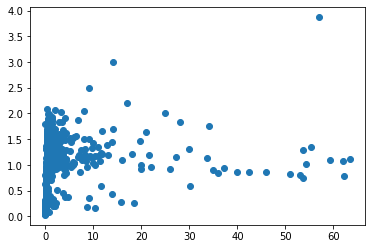

In [38]:
query = 'SELECT mass, radius FROM exoplanet.epn_core WHERE mass IS NOT NULL AND radius IS NOT NULL'
masa_radio = service.search(query)

i=0
x_masa = []
y_radio = []

for i in range(len(masa_radio)):
    x_masa.append(masa_radio.getvalue(name = 'mass', index = i))
    y_radio.append(masa_radio.getvalue(name = 'radius', index = i))
    
plt.scatter(x_masa, y_radio);

In [39]:
#help(plt.scatter)

In [40]:
import numpy as np

In [41]:
#help(np.log)

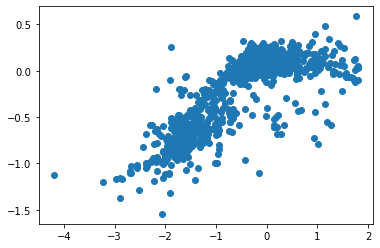

In [42]:
plt.scatter(np.log10(x_masa), np.log10(y_radio));

In [43]:
log_masa = np.log10(x_masa)
log_radio = np.log10(y_radio)

In [44]:
len(y_radio)

939

In [45]:
len(log_masa)

939

In [46]:
import sklearn as sk

In [47]:
from sklearn import mixture

In [48]:
# help(sk.mixture)

In [49]:
#help(sk.mixture.GaussianMixture)

In [50]:
mix_gauss = sk.mixture.GaussianMixture(n_components=2)

In [51]:
mix_gauss

GaussianMixture(n_components=2)

TypeError: float() argument must be a string or a number, not 'GaussianMixture'

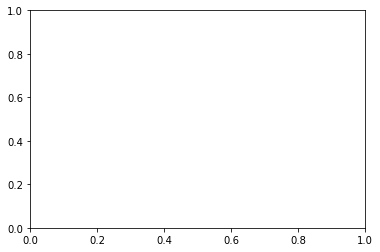

In [52]:
plt.plot(mix_gauss)